In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
!pip install minisom

In [149]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "posicoesBHC.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/matheus217/PROJECT_2_MACHINE_LEARNING_AND_KINECT/master/"
DATA_PATH = "KINECTDATA/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls KINECTDATA

horizontalarm.csv  posicoesBHC.csv  upperarm.csv


In [150]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+'posicoesBHC.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


dataset.head(  )

#print(y)

,0.577979,-0.165809,2.10639,0.549386,-0.0977304,2.1535,0.593226,0.27915,2.19618,0.676997,...,0.524145,-0.701156,2.36115,0.432044,-0.969329,2.46667,0.496714,-1.01033,2.39644,0
0,0.577941,-0.167960,2.10382,0.549244,-0.099584,2.15079,0.593113,0.278747,2.19336,0.676712,...,0.523562,-0.702159,2.35783,0.431467,-0.970322,2.46334,0.496337,-1.01146,2.39307,0
1,0.577908,-0.169476,2.10170,0.549153,-0.100936,2.14852,0.593000,0.278268,2.19057,0.676484,...,0.523136,-0.702915,2.35504,0.431046,-0.971068,2.46055,0.496034,-1.01232,2.39018,0
2,0.577940,-0.170435,2.09981,0.549153,-0.101834,2.14651,0.592934,0.277767,2.18786,0.676334,...,0.522777,-0.703442,2.35253,0.430692,-0.971584,2.45803,0.495741,-1.01293,2.38754,0
3,0.578070,-0.170646,2.09786,0.549220,-0.102189,2.14460,0.592853,0.277401,2.18567,0.676183,...,0.522532,-0.703417,2.34967,0.430452,-0.971546,2.45516,0.495552,-1.01294,2.38456,0
4,0.578252,-0.170950,2.09565,0.549314,-0.102599,2.14249,0.592664,0.277115,2.18362,0.675973,...,0.522090,-0.704860,2.34263,0.430019,-0.972971,2.44810,0.495147,-1.01439,2.37736,0


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 60, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

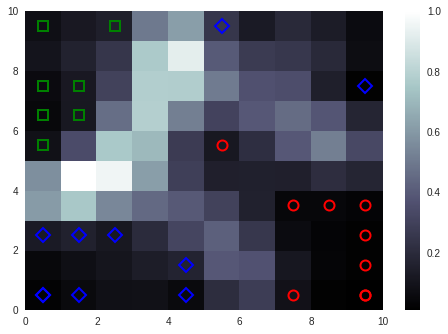

In [153]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()